

## **Loading Dataset from Drive**

In [0]:

from google.colab import drive,files
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Merging original and augmented dataset

In [0]:
# !unzip "drive/My Drive/handguns.zip" -d "Dataset/handguns"
# !unzip "drive/My Drive/razor_blades.zip" -d "Dataset/razor blades"
# !unzip "drive/My Drive/shurikens.zip" -d "Dataset/shurikens"

!unzip "drive/My Drive/Dataset.zip" 
!ls


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import cv2
import functools

**Function to Load Dataset into memory**

In [0]:
def loadDataset():
    dir = os.listdir('Dataset')
    X=[];
    y=[];

    for class_name in dir:

        files =os.listdir(os.path.join('Dataset',class_name))
        for f in files:
            if(f[-3:]=='png' or f[-3:]=='jpg'):
                X.append(os.path.join('Dataset',class_name,f))
                y.append(class_name)
                
    return pd.DataFrame({"path":X,"labels":y})


In [0]:
CLASSES=['handguns','razor blades','shurikens']

mapping={
    'handguns':0,
    'razor blades':1,
    'shurikens':2
   
}
NUM_CLASSES=len(CLASSES)

In [0]:
df=loadDataset()
print(df.head())
print(df['labels'].value_counts())

                                 path     labels
0  Dataset/shurikens/shurikens340.jpg  shurikens
1  Dataset/shurikens/shurikens689.jpg  shurikens
2  Dataset/shurikens/shurikens160.jpg  shurikens
3    Dataset/shurikens/B0047_0012.png  shurikens
4    Dataset/shurikens/B0047_0061.png  shurikens
handguns        1000
shurikens       1000
razor blades    1000
Name: labels, dtype: int64


### `Import required modules`

In [0]:
from keras.applications import MobileNet,InceptionV3
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix
from tensorflow.python.keras import backend as K
import keras.layers as layers
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D,Conv2D,Flatten,MaxPooling2D
import os
import keras
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from functools import partial
from sklearn.metrics import precision_recall_fscore_support


### **A simple custom model**

In [0]:
def simpleCustomModel(in_shape=(224,224,3),num_classes=3,opt='Adam'):
    in_layer = layers.Input(in_shape)
    # First convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                activation='relu', name='layer_conv1')(in_layer)
    net = MaxPooling2D(pool_size=2, strides=2)(net)

    # Second convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                activation='relu', name='layer_conv2')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)
    net = Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                activation='relu', name='layer_conv3')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)


    # Flatten the output of the conv-layer from 4-dim to 2-dim.
    net = Flatten()(net)

    # First fully-connected / dense layer with ReLU-activation.
    net = Dense(128, activation='relu')(net)
    # Last fully-connected / dense layer with softmax-activation
    # so it can be used for classification.
    net = Dense(num_classes, activation='softmax')(net)

    # Output of the Neural Network.
    output = net

    model = Model(inputs=in_layer,outputs=output)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	            metrics=["accuracy"])
    return model

def extendedModel(in_shape=(224,224,3),num_classes=3,opt='Adam',activations='relu'):
    in_layer = layers.Input(in_shape)
    # First convolutional layer with ReLU-activation and max-pooling.
  
    net = Conv2D(kernel_size=3, strides=2, filters=16, padding='same',
                activation=activations, name='layer_conv1')(in_layer)
    net = MaxPooling2D(pool_size=2, strides=2)(net)

    # Second convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                activation=activations, name='layer_conv2')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)

    # Third convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                activation=activations, name='layer_conv3')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)


    # FOURTH convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                activation=activations, name='layer_conv3')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)


    net= Flatten()
  
    # Flatten the output of the conv-layer from 4-dim to 2-dim.
    net = Denst(512,activations='relu')(net)
    net=layers.Dropout(0.4)(net)

    # First fully-connected / dense layer with ReLU-activation.
    net = Dense(128, activation='relu')(net)
    # Last fully-connected / dense layer with softmax-activation
    # so it can be used for classification.
    net = Dense(num_classes, activation='softmax')(net)

    # Output of the Neural Network.
    output = net

    model = Model(inputs=in_layer,outputs=output)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	            metrics=["accuracy"])
    return model

### **Alex Style Models**

In [0]:
def alexnet1(in_shape=(224,224,3), num_classes=3, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
    pool1 = layers.MaxPool2D(3, 2)(conv1)
    conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D(3, 2)(conv2)
    conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
    conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPool2D(3, 2)(conv4)
    flattened = layers.Flatten()(pool3)
    dense1 = layers.Dense(1024, activation='relu')(flattened)
    drop1 = layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(128, activation='relu')(drop1)
    drop2 = layers.Dropout(0.5)(dense2)
    preds = layers.Dense(num_classes, activation='softmax')(drop2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model


### **VGG Style custom models**




In [0]:
conv3 = partial(layers.Conv2D,
                kernel_size=3,
                strides=1,
                padding='same',
                activation='relu')

def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block

def _vgg(in_shape=(224,224,3),
         n_classes=3,
         opt='sgd',
         n_stages_per_blocks=[2, 2, 3, 3, 3]):
    in_layer = layers.Input(in_shape)

    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense1=layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(2048, activation='relu')(dense1)
    preds = layers.Dense(n_classes, activation='softmax')(dense2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

def vgg16(in_shape=(224,224,3), n_classes=NUM_CLASSES, opt='sgd'):
    return _vgg(in_shape, n_classes, opt)

def vgg19(in_shape=(224,224,3), n_classes=NUM_CLASSES, opt='sgd'):
    return _vgg(in_shape, n_classes, opt, [2, 2, 4, 4, 4])


### Training pipeline method



In [0]:
# def preprocessing(X):
#   X=X/255
#   return X
def startTraining(model, train_aug_df, val_df, BATCH_SIZE=32, epochs=50, checkpoint_path='weights'):
    train_datagen = ImageDataGenerator(
       rescale=1.0/255.0)
    val_datagen = ImageDataGenerator(
        rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_aug_df,
        x_col="path",
        y_col="labels",
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col="path",
        y_col="labels",
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

    # model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    #
    try:
      os.mkdir(checkpoint_path)
    except:
      pass
    checkpoint_path = checkpoint_path + "/cp-{epoch:04d}.hdf5"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        verbose=1,
        save_weights_only=False,
        period=1)

    history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(train_aug_df.shape[0] / (BATCH_SIZE)),
        epochs=epochs,
        callbacks=[cp_callback],
        validation_data=validation_generator,
        validation_steps=int(val_df.shape[0] / (BATCH_SIZE))
    )
    print(history.history.keys())
    return history


### Training

In [0]:

model = simpleCustomModel(num_classes=NUM_CLASSES,opt='Adam')
# weights_path='weights/cp-0003.hdf5'
# model.load_weights(weights_path)
print(model.summary())

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 28, 28, 64)        0   

In [0]:
df = loadDataset()
train, val = train_test_split(df, test_size=0.20, random_state=42)
print(train.shape)
print(val.shape)
history = startTraining(model, train, val, epochs=10,BATCH_SIZE=16)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


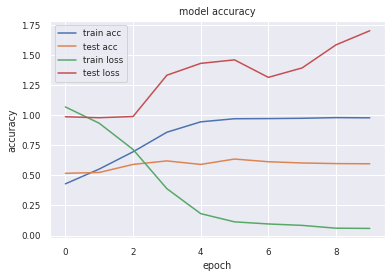

In [0]:
 print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc', 'train loss', 'test loss'], loc='upper left')

plt.show()


### Uplaod weigths on gDrive




In [0]:
!zip -r "drive/My Drive/weights.zip" "weights"
print("weights.zip file uploaded on your google drive. Kindly check your google drive")


updating: weights/ (stored 0%)
updating: weights/cp-0003.hdf5 (deflated 12%)
updating: weights/cp-0005.hdf5 (deflated 20%)
updating: weights/cp-0002.hdf5 (deflated 14%)
updating: weights/cp-0001.hdf5 (deflated 15%)
updating: weights/cp-0004.hdf5 (deflated 12%)
  adding: weights/cp-0006.hdf5 (deflated 22%)
  adding: weights/.ipynb_checkpoints/ (stored 0%)
  adding: weights/cp-0009.hdf5 (deflated 22%)
  adding: weights/cp-0010.hdf5 (deflated 22%)
  adding: weights/cp-0007.hdf5 (deflated 21%)
  adding: weights/cp-0008.hdf5 (deflated 22%)
weights.zip file uploaded on your google drive. Kindly check your google drive



## **Explore model Section**

In [0]:
# Download weights from gDrive if not present
!unzip "drive/My Drive/weights.zip" 

Archive:  drive/My Drive/weights.zip
   creating: weights/
  inflating: weights/cp-0003.hdf5    
  inflating: weights/cp-0005.hdf5    
  inflating: weights/cp-0002.hdf5    
  inflating: weights/cp-0001.hdf5    
  inflating: weights/cp-0004.hdf5    
  inflating: weights/cp-0006.hdf5    
   creating: weights/.ipynb_checkpoints/
  inflating: weights/cp-0009.hdf5    
  inflating: weights/cp-0010.hdf5    
  inflating: weights/cp-0007.hdf5    
  inflating: weights/cp-0008.hdf5    


In [0]:
# load weights
model = simpleCustomModel(num_classes=len(CLASSES))
weights_path='weights/cp-0005.hdf5'
model.load_weights(weights_path)

In [0]:
import math
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()



> Plot and display weights of any layer



(3, 3, 16, 32)


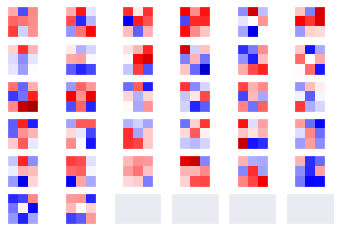

In [0]:
layer_input = model.layers[0]
out_layer_idx=3

layer_conv1 = model.layers[out_layer_idx]
weights_conv1 = layer_conv1.get_weights()[0]
print(weights_conv1.shape)
plot_conv_weights(weights=weights_conv1, input_channel=0)



> Display sample Image



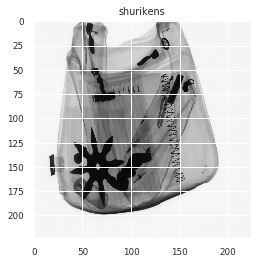

In [0]:
img_idx = 3
img=cv2.imread(df['path'][img_idx])
label = df['labels'][img_idx]
img=cv2.resize(img,(224,224))
plt.title(label)
plt.imshow(img)
plt.show()



> Display output of a layer



(1, 56, 56, 32)


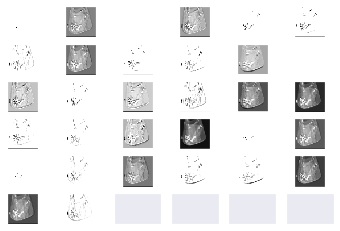

In [0]:
import keras.backend as K
layer_conv1 = model.layers[4]
output_conv1 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv1.output])
layer_output1 = output_conv1([[img]])[0]
print(layer_output1.shape)
plot_conv_output(values=layer_output1)


## **Inference Section**

In [0]:
def plotConfusionMatrix(mat):

    # Normalise
    normalized_mat = mat.astype('float') /mat.sum(axis=1)[:, np.newaxis]


    df_cm = pd.DataFrame(mat,index=CLASSES,columns=CLASSES)
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=0.8)  # for label size
    sn.heatmap(df_cm, annot=True,fmt='d', cbar=False)  # font size

    plt.show()
def inferenceImage(model,path):
    img = load_image(img_path=path,expand_dim=True)
    p=model.predict(img)
    predicted_class=CLASSES[np.argmax(p)]
  
    return predicted_class


def load_image(img_path,expand_dim=False ):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    if(expand_dim):
        img_array = np.expand_dims(img_array, axis=0)
    return (img_array/255)
def evaluateOnDataFrame(model,df):
    predictions = [];
    img_paths = list(df.loc[:, 'path'])
    truth=list(df.loc[:,'labels'])
    i=0;
    print(df['labels'].value_counts())
  
    for path in img_paths:
        x = load_image(path,expand_dim=True)
        truth[i]=mapping[truth[i]]
        p=model.predict(x)
        p=np.argmax(p)
        predictions.append(p)
        i=i+1;

    accuracy = accuracy_score(truth,predictions)
    confusion_mat=confusion_matrix(truth,predictions)
    precsion, recall, f1_ccore, _ = precision_recall_fscore_support(truth, predictions)
    print("Accuracy :",accuracy*100)
    print("Precision :", precsion*100)
    print("Recall :", recall*100)
    print("f1 :", f1_ccore*100)

    for i in range(len(CLASSES)):
      print(CLASSES[i],"accuracy :",f1_ccore[i]*100)
    print(confusion_mat)
    plotConfusionMatrix(confusion_mat)


### **Evaluate on Test Data**

In [0]:
from math import sqrt
def plot_images(images, cls_true, cls_pred=None):

    # Create figure with 3x3 sub-plots.
    count = len(images)
    fig, axes = plt.subplots(int(sqrt(count)), int(sqrt(count)))
#     fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


def testRandom(model,df,count =16):
  idx=np.random.randint(0,df.shape[0],count)
  file_path_list=list(df.loc[idx,'path'])
  true_labels =list(df.loc[idx,'labels'])

  img_list =[];
  predicted_labels=[]
  for file_path in file_path_list:
      img = cv2.imread(file_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img_list.append(img)
      prediction=inferenceImage(model,file_path)
      predicted_labels.append(prediction)

  plot_images(img_list,true_labels,predicted_labels)
    

shurikens       217
razor blades    197
handguns        186
Name: labels, dtype: int64
Accuracy : 59.0
Precision : [53.27102804 56.03864734 69.27374302]
Recall : [61.29032258 58.88324873 57.14285714]
f1 : [57.         57.42574257 62.62626263]
[[114  43  29]
 [ 55 116  26]
 [ 45  48 124]]


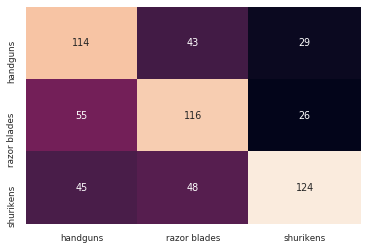

In [0]:
evaluateOnDataFrame(model,val)

handguns        1000
shurikens       1000
razor blades    1000
Name: labels, dtype: int64
Accuracy : 89.56666666666668
Precision : [86.85714286 89.3037336  92.80500521]
Recall : [91.2 88.5 89. ]
f1 : [88.97560976 88.90005023 90.86268504]
[[912  52  36]
 [ 82 885  33]
 [ 56  54 890]]


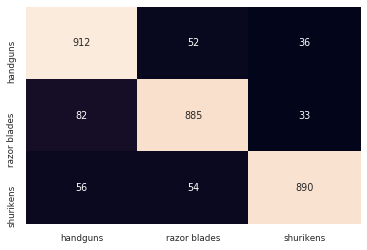

In [0]:
evaluateOnDataFrame(model,df)

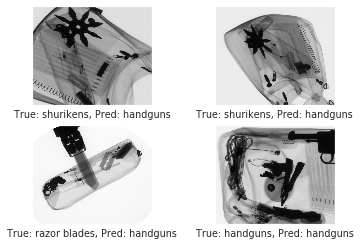

In [0]:
testRandom(model,df,count=4)